# Calculating Correlation Between Stocks 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas_datareader import data as wb 
import yfinance

In [9]:
yfinance.pdr_override()

## Importing Data & Getting it's Daily Return

In [5]:
tickers = ['BFIN.jk', 'BNGA.jk', 'ADMF.jk', 'MFIN.jk', 'APIC.jk', 'ARNA.jk']
financial_institution = pd.DataFrame()
for ticker in tickers : 
    financial_institution[ticker] = wb.get_data_yahoo(ticker, start = '2017-01-01', end = '2023-04-01')['Adj Close']
financial_institution.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BFIN.jk,BNGA.jk,ADMF.jk,MFIN.jk,APIC.jk,ARNA.jk
Date,,,,,,
2017-01-02,262.053741,654.197388,3709.806641,262.041595,428.0,376.830078
2017-01-03,262.053741,654.197388,3599.886475,262.041595,416.0,380.453461
2017-01-04,247.079239,654.197388,3517.445801,262.041595,410.0,297.116028
2017-01-05,258.310089,646.455444,3489.966064,263.765564,412.0,360.887268
2017-01-06,258.310089,650.326416,3462.486084,263.765564,412.0,362.336609


In [7]:
daily_return = financial_institution.pct_change()
daily_return.dropna(inplace = True)
daily_return.head()

,BFIN.jk,BNGA.jk,ADMF.jk,MFIN.jk,APIC.jk,ARNA.jk
Date,,,,,,
2017-01-03,0.000000,0.000000,-0.029630,0.000000,-0.028037,0.009615
2017-01-04,-0.057143,0.000000,-0.022901,0.000000,-0.014423,-0.219048
2017-01-05,0.045454,-0.011834,-0.007812,0.006579,0.004878,0.214634
2017-01-06,0.000000,0.005988,-0.007874,0.000000,0.000000,0.004016
2017-01-09,0.028986,0.059524,0.007936,-0.026144,-0.009709,-0.008000


## Calculating Correlation

In [8]:
daily_return.corr()

,BFIN.jk,BNGA.jk,ADMF.jk,MFIN.jk,APIC.jk,ARNA.jk
BFIN.jk,1.000000,0.113052,0.174694,-0.006794,0.046051,0.093030
BNGA.jk,0.113052,1.000000,0.241196,0.030774,0.077790,0.060274
ADMF.jk,0.174694,0.241196,1.000000,0.066038,0.091859,0.062777
MFIN.jk,-0.006794,0.030774,0.066038,1.000000,0.080355,-0.009421
APIC.jk,0.046051,0.077790,0.091859,0.080355,1.000000,0.043562
ARNA.jk,0.093030,0.060274,0.062777,-0.009421,0.043562,1.000000


### Drawing Correlation With Heatmap

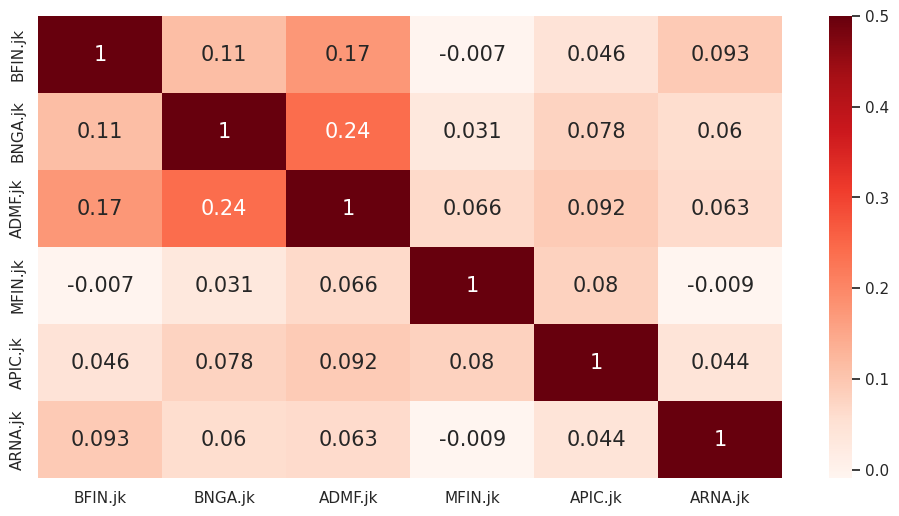

In [20]:
plt.figure(figsize = (12,6))
sns.set(font_scale = 1)
sns.heatmap(round(daily_return.corr(),3), cmap = 'Reds', annot = True, vmax = 0.5, annot_kws = {'size' : 15})
plt.show()